# 1. Импорт модулей

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Markdown

sns.set_style("whitegrid")

plt.rcParams.update({
    'axes.grid': True,
    'grid.alpha': 0.3,  
    'font.family': 'Arial',
    'font.size': 12,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

# 2. Чтение данных

In [2]:
orders = pd.read_csv('data/orders.csv')
plan = pd.read_csv('data/plan.csv')
payments = pd.read_csv('data/payments.csv')

**Таблица orders.csv:**
- order_id – номер заявки;
- created_at - дата создания заявки;
- put_at - дата выдачи;
- closed_at - дата закрытия;
- issued_sum - сумма выдачи.

**Таблица plan.csv:**
- order_id – номер заявки;
- plan_at - дата планового платежа;
- plan_sum_total - сумма планового платежа (накопленным итогом);

**Таблица plan.csv:**
- order_id – номер заявки;
- paid_at - дата фактического платежа;
- paid_sum - сумма фактического платежа.

# 3. Предварительный анализ и предобработка

In [3]:
# функция для осмотра таблиц
def general_info(df):
    display(Markdown('**Первые пять строк таблицы**'))
    display(df.head())
    display(Markdown('**Описательная статистика**'))
    display(df.describe())
    display(Markdown('**Типы данных**'))
    display(df.dtypes)
    display(Markdown('**Количество уникальных значений**'))
    display(df.nunique())
    display(Markdown('**Количество пропущенных значений**'))
    display(df.isna().sum())
    display(Markdown('**Количество дубликатов**'))
    display(df.duplicated().sum())
    display(Markdown('**Размер таблицы**'))
    display(df.shape)

## 3.1. Анализ и предобработка таблицы `orders`

Таблица `orders` это общая информация по кредитам. Когда выдавался кредит, когда закончился и какая сумма была выдана.  

In [4]:
# посмотрим на общую информацию
general_info(orders)

**Первые пять строк таблицы**

,order_id,created_at,put_at,closed_at,issued_sum
0,400001732,2022-06-02 00:00:23.997,2022-06-02 20:18:00.180,2022-10-17 11:52:22.190,13600.0
1,400005838,2022-06-02 00:10:22.997,2022-06-02 15:41:33.267,2022-06-02 17:38:43.917,20000.0
2,400007915,2022-06-02 00:18:04.000,2022-06-05 19:17:38.547,2022-06-21 21:55:51.877,5820.0
3,400008952,2022-06-02 00:22:07.000,2022-06-03 14:25:18.033,2022-07-12 10:47:46.307,9000.0
4,400009027,2022-06-02 00:25:39.000,2022-06-02 00:40:40.320,2022-06-22 14:15:07.423,5000.0


**Описательная статистика**

,order_id,issued_sum
count,5.574800e+04,55748.000000
mean,4.477471e+08,7907.202052
std,2.755391e+07,4985.848416
min,4.000017e+08,1000.000000
25%,4.237195e+08,4000.000000
50%,4.480092e+08,7290.000000
75%,4.716685e+08,10850.000000
max,4.951775e+08,28570.000000


**Типы данных**

order_id        int64
created_at     object
put_at         object
closed_at      object
issued_sum    float64
dtype: object

**Количество уникальных значений**

order_id      55748
created_at    55039
put_at        55732
closed_at     46453
issued_sum       70
dtype: int64

**Количество пропущенных значений**

order_id         0
created_at       0
put_at           0
closed_at     9276
issued_sum       0
dtype: int64

**Количество дубликатов**

np.int64(0)

**Размер таблицы**

(55748, 5)

**Вывод.**  

Краткая история таблицы. В таблице 55748 строк - каждая строка это один выданный кредит. Средняя сумма выдачи кредита 7907.  Аномальных значений суммы выдачи нет. Колонки с датами имеют тип `object`, в будущем заменим их тип. Дубликатов нет. В колонке `closed_at` имеется 9276 пропущенных значений, это значит что эти кредиты еще не закрыты. 

In [5]:
# заменим тип колоной с датами на тип даты
orders[['created_at', 'put_at', 'closed_at']] = orders[['created_at', 'put_at', 'closed_at']].apply(pd.to_datetime)

In [6]:
# снова посмотрим на общую информацию
general_info(orders)

**Первые пять строк таблицы**

,order_id,created_at,put_at,closed_at,issued_sum
0,400001732,2022-06-02 00:00:23.997,2022-06-02 20:18:00.180,2022-10-17 11:52:22.190,13600.0
1,400005838,2022-06-02 00:10:22.997,2022-06-02 15:41:33.267,2022-06-02 17:38:43.917,20000.0
2,400007915,2022-06-02 00:18:04.000,2022-06-05 19:17:38.547,2022-06-21 21:55:51.877,5820.0
3,400008952,2022-06-02 00:22:07.000,2022-06-03 14:25:18.033,2022-07-12 10:47:46.307,9000.0
4,400009027,2022-06-02 00:25:39.000,2022-06-02 00:40:40.320,2022-06-22 14:15:07.423,5000.0


**Описательная статистика**

,order_id,created_at,put_at,closed_at,issued_sum
count,5.574800e+04,55748,55748,46472,55748.000000
mean,4.477471e+08,2022-07-17 18:39:46.071710208,2022-07-20 10:34:09.089166336,2022-08-19 02:29:16.057067520,7907.202052
min,4.000017e+08,2022-06-02 00:00:23.997000,2022-06-02 00:40:40.320000,2022-06-02 06:53:54.503000,1000.000000
25%,4.237195e+08,2022-06-24 17:11:26.247000064,2022-06-27 18:19:40.993500160,2022-07-19 17:54:56.134500096,4000.000000
50%,4.480092e+08,2022-07-17 18:42:36,2022-07-20 18:03:11.164999936,2022-08-15 20:33:26.241999872,7290.000000
75%,4.716685e+08,2022-08-09 14:34:08.499249920,2022-08-11 20:32:59.392749824,2022-09-12 06:44:54.682500096,10850.000000
max,4.951775e+08,2022-08-31 23:49:42.997000,2022-09-29 18:46:58.387000,2022-12-08 09:48:38.233000,28570.000000
std,2.755391e+07,NaN,NaN,NaN,4985.848416


**Типы данных**

order_id               int64
created_at    datetime64[ns]
put_at        datetime64[ns]
closed_at     datetime64[ns]
issued_sum           float64
dtype: object

**Количество уникальных значений**

order_id      55748
created_at    55039
put_at        55732
closed_at     46453
issued_sum       70
dtype: int64

**Количество пропущенных значений**

order_id         0
created_at       0
put_at           0
closed_at     9276
issued_sum       0
dtype: int64

**Количество дубликатов**

np.int64(0)

**Размер таблицы**

(55748, 5)

**Дополнительно к предыдущему выводу.** 

- Первая заявка на кредит была получена `2022-06-02`, а последняя `2022-08-31`.
- Первый кредит был выдан `2022-06-02`, а последний `2022-09-29`.
- Первый кредит был закрыт`2022-06-02`, а последний `2022-12-08`.

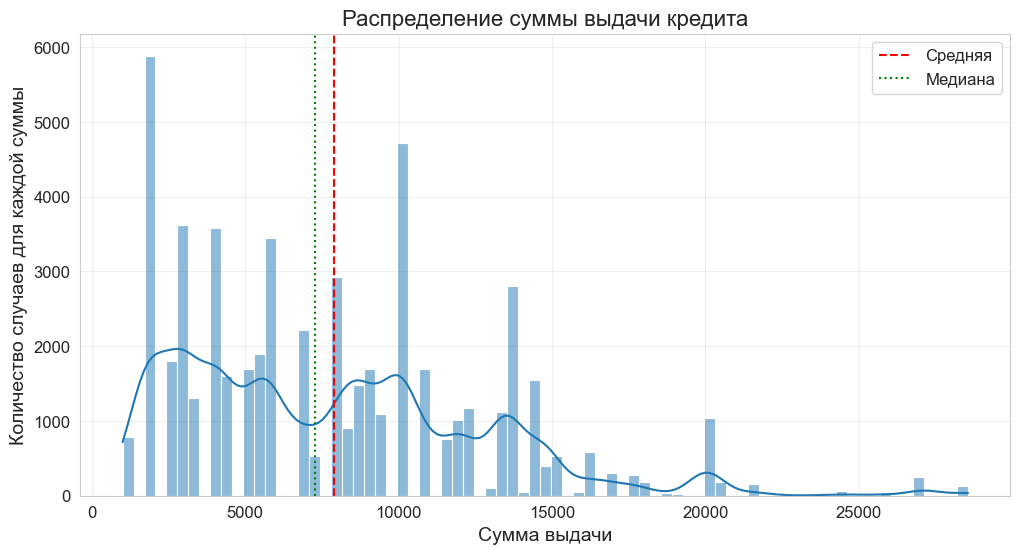

In [7]:
# теперь посомтрим на распределение суммы выдачи кредита
plt.figure(figsize=(12, 6))
sns.histplot(orders, x='issued_sum', kde=True)

# добавляем среднюю линию
mean_value = orders['issued_sum'].mean()
plt.axvline(mean_value, color='red', linestyle='--', label='Средняя')
# добавляем медиану
median_value = orders['issued_sum'].median()
plt.axvline(median_value, color='green', linestyle=':', label='Медиана')

plt.title('Распределение суммы выдачи кредита')
plt.xlabel('Сумма выдачи')
plt.ylabel('Количество случаев для каждой суммы')

plt.legend()
plt.show()

Большинство кредитов выдается в диапазоне до 10 000. Средняя сумма выдачи выше медианной, что указывает наличие несколько крупных сумм выдачи, которые увеличивают среднее значение. По этим данным можно ориентироваться на наиболее популярные суммы выдачи

In [8]:
# прежде чем продолжать строить графики, сформируем необходимую для этого таблицу

# извлечем колонку с датой создания заявки и суммой выдачи кредита
orders_copy = orders.loc[:, ['created_at', 'issued_sum']]
# оставим только год-месяц-день
orders_copy['created_at'] = orders_copy['created_at'].dt.to_period('d')
# поменяем тип даты
orders_copy['created_at'] = orders_copy['created_at'].dt.to_timestamp()
# установим в качестве индекса дату
orders_copy.set_index('created_at', inplace=True)
# добавим новую колонку со скользящим средним выданной суммы (в 7 дней)
orders_copy['rol_avg_7d'] = orders_copy['issued_sum'].rolling(window='7D').mean()

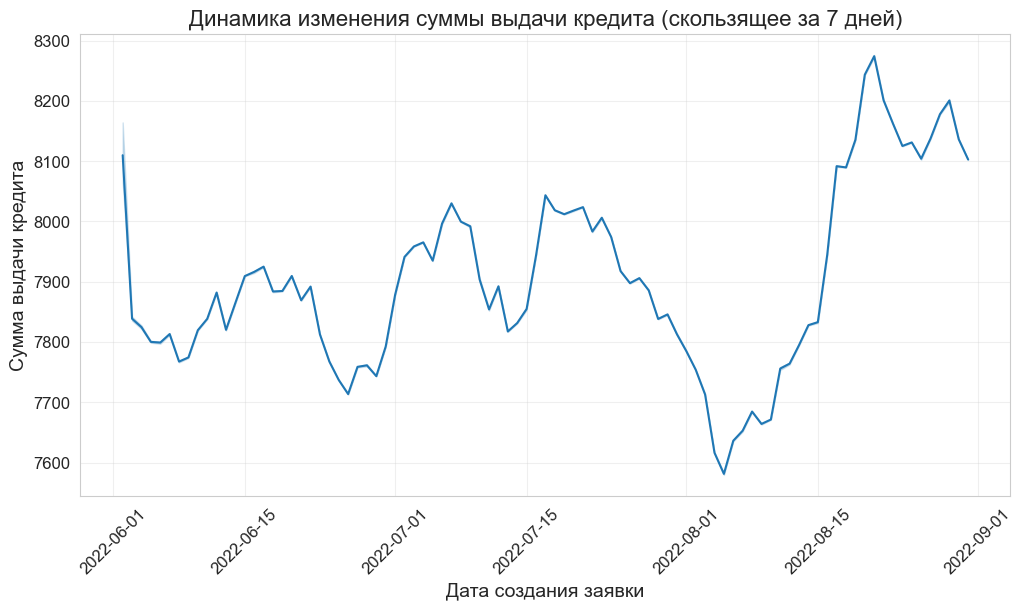

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(orders_copy, x=orders_copy.index, y='rol_avg_7d')

plt.title('Динамика изменения суммы выдачи кредита (скользящее за 7 дней)')
plt.xlabel('Дата создания заявки')
plt.ylabel('Сумма выдачи кредита')
plt.xticks(rotation=45)

plt.show()

В целом, график показывает, что сумма выдачи кредита остается в пределах диапазона 7600–8200, что может говорить о стабильности. Сезонноти в данных не наблюдется.

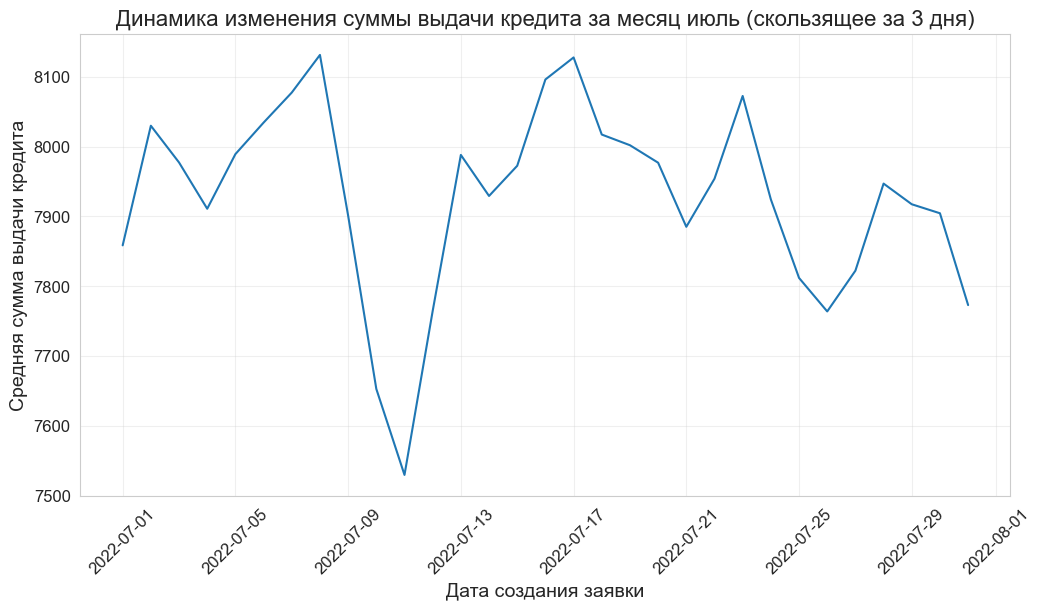

In [10]:
# продолжаем строить графики

# добавим новую колонку со скользящим средним выданной суммы (в 3 дня)
orders_copy['rol_avg_3d'] = orders_copy['issued_sum'].rolling(window='3D').mean()
# выберем например месяц июль и посмотрим на него поближе
month_period = orders_copy[orders_copy.index.to_period('M')=="2022-07"]
month_period = month_period.groupby(month_period.index).rol_avg_3d.mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=month_period.index, y=month_period.values)

plt.title('Динамика изменения суммы выдачи кредита за месяц июль (скользящее за 3 дня)')
plt.xlabel('Дата создания заявки')
plt.ylabel('Средняя сумма выдачи кредита')
plt.xticks(rotation=45)

plt.show()

Мы смотрим ближе на месяц июль чтобы найти интересный паттерн. То же самое можно проделать с другим месяцем. Картина похожая. В целом, график показывает, что сумма выдачи кредита остается в пределах диапазона 7600–8200, что может говорить о стабильности. Тренда не наблюдется.

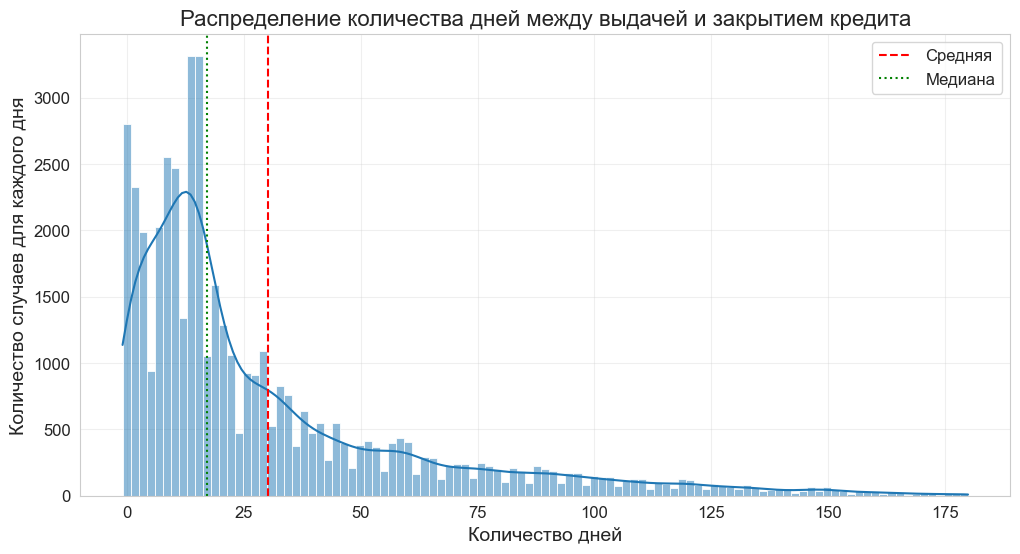

In [11]:
# теперь посмотрим на количества дней между выдачей и закрытием кредита

# посчитаем разница дней закрытия и открытия кредита
diff_day = (orders.closed_at - orders.put_at).dt.days

plt.figure(figsize=(12, 6))
sns.histplot(diff_day, kde=True)

# добавляем среднюю линию
mean_value = diff_day.mean()
plt.axvline(mean_value, color='red', linestyle='--', label='Средняя')
# добавляем медиану
median_value = diff_day.median()
plt.axvline(median_value, color='green', linestyle=':', label='Медиана')

plt.title('Распределение количества дней между выдачей и закрытием кредита')
plt.xlabel('Количество дней')
plt.ylabel('Количество случаев для каждого дня')

plt.legend()
plt.show()

Большинство кредитов закрывается в короткие сроки (первые 30-60 дней). Длинный правый хвост показывает наличие кредитов с длительным сроком закрытия(относительно). 

Добавим новую колонку, в которой будут два значения, `closed` - если кредит был закрыт и `not closed` - если кредит не был закрыт.

In [12]:
orders['closed_loan'] = orders.closed_at.apply(lambda x: 'closed' if pd.notna(x) 
                                                                  else 'not closed')

orders['closed_loan'].value_counts(normalize=True)

closed_loan
closed        0.833608
not closed    0.166392
Name: proportion, dtype: float64

83% из всех кредитов были выплачены, а 17% нет.

Поищем последние недочеты в данных.

In [13]:
# посмотрим, есть ли случаи когда кредит закрывался раньше чем создание заявки этого же кредита
diff_time = (orders.closed_at - orders.put_at) < pd.Timedelta(0)
diff_time_index = orders[diff_time].index
closed_less_put = orders.iloc[diff_time_index]
display(closed_less_put)
display(plan[plan['order_id'].isin(closed_less_put.order_id)])
display(payments[payments['order_id'].isin(closed_less_put.order_id)])

,order_id,created_at,put_at,closed_at,issued_sum,closed_loan
38182,465402852,2022-08-03 15:58:41,2022-08-13 17:40:26.047,2022-08-13,2000.0,closed


,order_id,plan_at,plan_sum_total
286972,465402852,2022-09-05,0.0


,order_id,paid_at,paid_sum


Такой случай есть, поэтому удалим его.

In [14]:
orders.drop(diff_time_index, inplace=True)

## 3.2. Анализ и предобработка таблицы `plan`

Таблица `plan` это плановые платежи за кредит. 

In [15]:
# посмотрим на общую информацию
general_info(plan)

**Первые пять строк таблицы**

,order_id,plan_at,plan_sum_total
0,400001732,2022-06-02,5600.0
1,400001732,2022-07-02,9450.0
2,400001732,2022-08-01,12170.0
3,400001732,2022-08-31,14890.0
4,400001732,2022-09-30,17610.0


**Описательная статистика**

,order_id,plan_sum_total
count,4.202820e+05,4.202820e+05
mean,4.478982e+08,8.662569e+03
std,2.756899e+07,1.095191e+04
min,4.000017e+08,0.000000e+00
25%,4.237028e+08,3.570000e+03
50%,4.480977e+08,6.900000e+03
75%,4.720303e+08,1.215847e+04
max,4.951775e+08,2.300000e+06


**Типы данных**

order_id            int64
plan_at            object
plan_sum_total    float64
dtype: object

**Количество уникальных значений**

order_id          55748
plan_at             307
plan_sum_total    97716
dtype: int64

**Количество пропущенных значений**

order_id          0
plan_at           0
plan_sum_total    0
dtype: int64

**Количество дубликатов**

np.int64(0)

**Размер таблицы**

(420282, 3)

**Вывод.**

В таблице 420282 строк. Минимальная сумма планового платежа составляет 0, а максимальная 2.3 млн.  Колонка с датой имеет не тот тип данных. Нет пустых значений.  И нет дубликатов. Позже посмотрим на эти аномальные суммы платежа поближе.

In [16]:
# заменим тип колонки с датой
plan.plan_at = pd.to_datetime(plan.plan_at)

In [17]:
# снова посмотрим на общую информацию
general_info(plan)

**Первые пять строк таблицы**

,order_id,plan_at,plan_sum_total
0,400001732,2022-06-02,5600.0
1,400001732,2022-07-02,9450.0
2,400001732,2022-08-01,12170.0
3,400001732,2022-08-31,14890.0
4,400001732,2022-09-30,17610.0


**Описательная статистика**

,order_id,plan_at,plan_sum_total
count,4.202820e+05,420282,4.202820e+05
mean,4.478982e+08,2022-10-10 12:39:00.691249920,8.662569e+03
min,4.000017e+08,2022-06-02 00:00:00,0.000000e+00
25%,4.237028e+08,2022-08-22 00:00:00,3.570000e+03
50%,4.480977e+08,2022-10-09 00:00:00,6.900000e+03
75%,4.720303e+08,2022-11-29 00:00:00,1.215847e+04
max,4.951775e+08,2023-06-11 00:00:00,2.300000e+06
std,2.756899e+07,NaN,1.095191e+04


**Типы данных**

order_id                   int64
plan_at           datetime64[ns]
plan_sum_total           float64
dtype: object

**Количество уникальных значений**

order_id          55748
plan_at             307
plan_sum_total    97716
dtype: int64

**Количество пропущенных значений**

order_id          0
plan_at           0
plan_sum_total    0
dtype: int64

**Количество дубликатов**

np.int64(0)

**Размер таблицы**

(420282, 3)

Все в порядке, движемся дальше.

## 3.3. Анализ и предобработка таблицы `payments`

Таблица `payments` это фактические платежи за кредит. 

In [18]:
# посмотрим на общую информацию
general_info(payments)

**Первые пять строк таблицы**

,order_id,paid_at,paid_sum
0,400013633,2022-06-02 00:48:13.800,2500.0
1,400018480,2022-06-02 01:52:05.707,1070.0
2,400032001,2022-06-02 04:55:40.307,4200.0
3,400033195,2022-06-02 05:44:23.480,2850.0
4,400039407,2022-06-02 06:53:54.503,10100.0


**Описательная статистика**

,order_id,paid_sum
count,1.432840e+05,143284.000000
mean,4.471506e+08,3902.743457
std,2.742581e+07,4528.141434
min,4.000017e+08,0.020000
25%,4.231827e+08,1039.700000
50%,4.470855e+08,2125.600000
75%,4.707384e+08,4600.000000
max,4.951775e+08,49469.370000


**Типы данных**

order_id      int64
paid_at      object
paid_sum    float64
dtype: object

**Количество уникальных значений**

order_id     53730
paid_at     143172
paid_sum     16086
dtype: int64

**Количество пропущенных значений**

order_id    0
paid_at     0
paid_sum    0
dtype: int64

**Количество дубликатов**

np.int64(5)

**Размер таблицы**

(143284, 3)

**Вывод.**

В таблице 143284 строк. Аномальных значений не наблюдается.  Колонка с датой имеет не тот тип данных. Нет пустых значений.  Имеется 5 дубликатов.

In [19]:
# заменим тип колонки с датой
payments.paid_at = pd.to_datetime(payments.paid_at)
# удалим дубликаты
payments = payments.drop_duplicates()

In [20]:
# снова посмотрим на общую информацию
general_info(payments)

**Первые пять строк таблицы**

,order_id,paid_at,paid_sum
0,400013633,2022-06-02 00:48:13.800,2500.0
1,400018480,2022-06-02 01:52:05.707,1070.0
2,400032001,2022-06-02 04:55:40.307,4200.0
3,400033195,2022-06-02 05:44:23.480,2850.0
4,400039407,2022-06-02 06:53:54.503,10100.0


**Описательная статистика**

,order_id,paid_at,paid_sum
count,1.432790e+05,143279,143279.000000
mean,4.471512e+08,2022-08-21 00:38:27.878156800,3902.699234
min,4.000017e+08,2022-06-02 00:48:13.800000,0.020000
25%,4.231829e+08,2022-07-19 15:49:03.251500032,1039.700000
50%,4.470855e+08,2022-08-16 23:36:16.689999872,2125.600000
75%,4.707384e+08,2022-09-15 17:48:14.293500160,4600.000000
max,4.951775e+08,2022-12-08 13:28:23.703000,49469.370000
std,2.742592e+07,NaN,4528.164845


**Типы данных**

order_id             int64
paid_at     datetime64[ns]
paid_sum           float64
dtype: object

**Количество уникальных значений**

order_id     53730
paid_at     143172
paid_sum     16086
dtype: int64

**Количество пропущенных значений**

order_id    0
paid_at     0
paid_sum    0
dtype: int64

**Количество дубликатов**

np.int64(0)

**Размер таблицы**

(143279, 3)

Посмотрим на распределение фактических платежей.

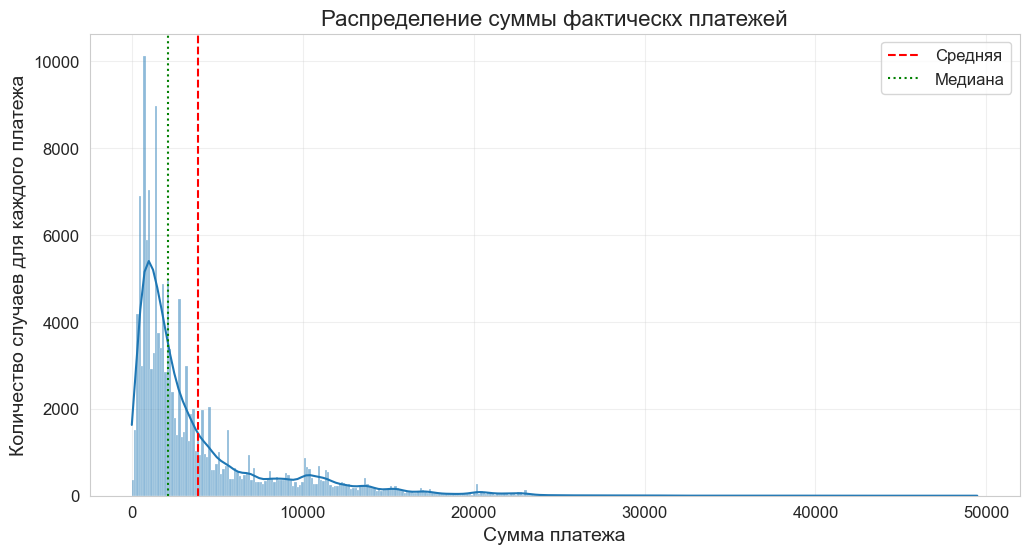

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(payments, x='paid_sum', kde=True)

plt.title('Распределение суммы фактическх платежей')
plt.xlabel('Сумма платежа')
plt.ylabel('Количество случаев для каждого платежа')

# добавляем среднюю линию
mean_value = payments.paid_sum.mean()
plt.axvline(mean_value, color='red', linestyle='--', label='Средняя')
# добавляем медиану
median_value = payments.paid_sum.median()
plt.axvline(median_value, color='green', linestyle=':', label='Медиана')

plt.legend()
plt.show()

Основная масса платежей имеет небольшие суммы - до 10000. Если сравнивать это распределение с плановыми платежами, то в случае с фактическими платежами нет сильно завышенных платежей.

## 3.4. Финальная предобработка данных

В разделе про плановые платежи мы видели, что среди платежей есть сильно большие значения относительно других платежей. Найдем эти значения и разберемся, что с ними делать.

In [22]:
# в этом блоке мы соединяем таблицы plan и payments чтобы выявить 
# эти аномальные значения
plan_group = plan.groupby('order_id', as_index=False).plan_sum_total.max()
paym_group = payments.groupby('order_id', as_index=False).paid_sum.sum()
plan_paym = plan_group.merge(paym_group, on='order_id')
plan_paym.sort_values('plan_sum_total', ascending=False)

,order_id,plan_sum_total,paid_sum
16536,429430737,2300000.0,20200.0
16040,428503438,2300000.0,20200.0
8225,414502017,2070000.0,20520.0
8646,415298088,1725000.0,17100.0
13371,423601955,1380000.0,12720.0
...,...,...,...
1585,402709782,1150.0,1030.0
13572,423944614,1150.0,1150.0
43377,477087561,1150.0,1020.0
9599,416942354,1150.0,1050.0


С высокой долей вероятности в некоторых строках плановых платежей сумма по ошибке завышена в 100 раз. 

Попробуем найти эти платежи. 

In [23]:
plan_paym[plan_paym['plan_sum_total']>(plan_paym['paid_sum']*100)].sort_values('plan_sum_total')

,order_id,plan_sum_total,paid_sum
46360,482360654,7801.63,50.0
28969,451657120,14529.00,20.0
5352,409504204,15656.27,100.0
31439,456036504,23409.04,60.0
26144,446524528,23482.48,200.0
10396,418339658,25118.77,100.0
14307,425273458,115000.00,1040.0
13929,424578271,230000.00,2100.0
14837,426168146,230000.00,2060.0
9441,416695647,460000.00,4520.0


Таких аномально больших значений не так много. Тем не менее с ними придется разобраться. 

В блоке ниже мы вручную просматриваем каждый кредит, чтобы убедиться - ошибка это или нет. 

In [24]:
a = 429430737
display(orders[orders['order_id']==a])
display(plan[plan['order_id']==a])
display(payments[payments['order_id']==a])

,order_id,created_at,put_at,closed_at,issued_sum,closed_loan
17137,429430737,2022-06-30 11:26:56,2022-06-30 18:37:51.350,2022-06-30 19:42:20.943,20000.0,closed


,order_id,plan_at,plan_sum_total
129301,429430737,2022-07-15,2300000.0


,order_id,paid_at,paid_sum
16207,429430737,2022-06-30 19:42:20.943,20200.0


Просмотр вручуню этих платежей показал действительное наличие ошибки в данных. Поэтому без раздумий уменьшим такие аномальные платежи в 100 раз. 

In [25]:
plan.loc[plan['order_id'].isin(plan[plan['plan_sum_total']>=115000].order_id), 'plan_sum_total'] /=100

Данные плановых платежей актуальны на 8 декабря 2022 года. Оставим данные только за период до этой даты.

In [26]:
plan = plan[plan['plan_at']<='2022-12-8']

Колонка `plan_sum_total` - сумма планового платежа (накопленным итогом). Добавим в таблицу плановых платежей новую колонку с платежами помесячно (без накоплений).

In [27]:
plan['plan_sum'] = plan.groupby('order_id')['plan_sum_total'].transform(lambda x: x-x.shift(1))
plan['plan_sum'] = plan['plan_sum'].fillna(plan['plan_sum_total'])

In [28]:
plan.head()

,order_id,plan_at,plan_sum_total,plan_sum
0,400001732,2022-06-02,5600.0,5600.0
1,400001732,2022-07-02,9450.0,3850.0
2,400001732,2022-08-01,12170.0,2720.0
3,400001732,2022-08-31,14890.0,2720.0
4,400001732,2022-09-30,17610.0,2720.0


# 4. Формирование предытоговой таблицы

Для предытоговой таблицы объединим таблицы `plan` и `payments`.

In [29]:
# сначала отсортируем данные по order_id
plan_sorted = plan.sort_values(['order_id', 'plan_at'])
payment_sorted = payments.sort_values(['order_id', 'paid_at'])

# создадим уникальный номер для каждой строки в рамках order_id
plan_sorted['row_num'] = plan_sorted.groupby('order_id').cumcount()
payment_sorted['row_num'] = payment_sorted.groupby('order_id').cumcount()

In [30]:
# теперь можно объединить данные по order_id и row_num
merged_df = pd.merge(plan_sorted, payment_sorted, on=['order_id', 'row_num'], how='inner')

# уберем вспомогательный столбец и плановые платежи (с накопленным итогом)
merged_df = merged_df.drop(columns=['row_num', 'plan_sum_total'])

Добавим в таблицу необходимые для расчета колонки.

In [31]:
# расчет дней просрочки
merged_df['days_late'] = (merged_df['paid_at'] - merged_df['plan_at']).dt.days
# оставляем из предыдущей колонки только положительные значения
merged_df['days_late_0'] = merged_df[merged_df['days_late']>0].days_late
# расчет дней просрочки до секунд
merged_df['days_late_sec'] = merged_df['paid_at'] - merged_df['plan_at']
# определение факта просрочки по времени
merged_df['is_late'] = merged_df['days_late_sec'] > pd.Timedelta(0)

# добавим также недоплату
merged_df['underpayment'] = merged_df['plan_sum'] - merged_df['paid_sum']
# оставим только положиельные значения недоплаты
merged_df['underpayment_0'] = merged_df[merged_df['underpayment']>0].underpayment
# факт недоплаты
merged_df['is_underpayment'] = merged_df['underpayment']>0

In [32]:
merged_df.head()

,order_id,plan_at,plan_sum,paid_at,paid_sum,days_late,days_late_0,days_late_sec,is_late,underpayment,underpayment_0,is_underpayment
0,400001732,2022-06-02,5600.0,2022-06-02 20:20:16.790,5600.0,0,NaN,0 days 20:20:16.790000,True,0.0,NaN,False
1,400001732,2022-07-02,3850.0,2022-06-16 16:05:26.007,3850.0,-16,NaN,-16 days +16:05:26.007000,False,0.0,NaN,False
2,400001732,2022-08-01,2720.0,2022-07-15 12:32:34.087,2720.0,-17,NaN,-17 days +12:32:34.087000,False,0.0,NaN,False
3,400001732,2022-08-31,2720.0,2022-08-16 12:38:01.237,2720.0,-15,NaN,-15 days +12:38:01.237000,False,0.0,NaN,False
4,400001732,2022-09-30,2720.0,2022-09-15 12:14:48.867,2720.0,-15,NaN,-15 days +12:14:48.867000,False,0.0,NaN,False


Поскольку часть кредитов еще не закрыта, нерационально будет делать дальнейший анализ всего массива данных. Поэтому разделим кредиты на закрытые и нет, и сделаем расчет каждого по отедльности.

In [33]:
# закрытыте кредиты
merged_df_closed = merged_df[merged_df['order_id'].isin(orders[orders['closed_loan']=='closed'].order_id)]
# не закрытые кредиты
merged_df_not_closed = merged_df[merged_df['order_id'].isin(orders[orders['closed_loan']=='not closed'].order_id)]

Перед расчетом просрочки сегментируем клиентов по просроченным платежам.

Сначала будут клиенты закрывшие свой кредит.

C:\Users\Admin\AppData\Local\Temp\ipykernel_8812\260907145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_closed['days_late_numeric'] = merged_df_closed['days_late_sec'].apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_8812\260907145.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_closed['late_category'] = merged_df_closed['days_late_numeric'].apply(categorize_late_days)


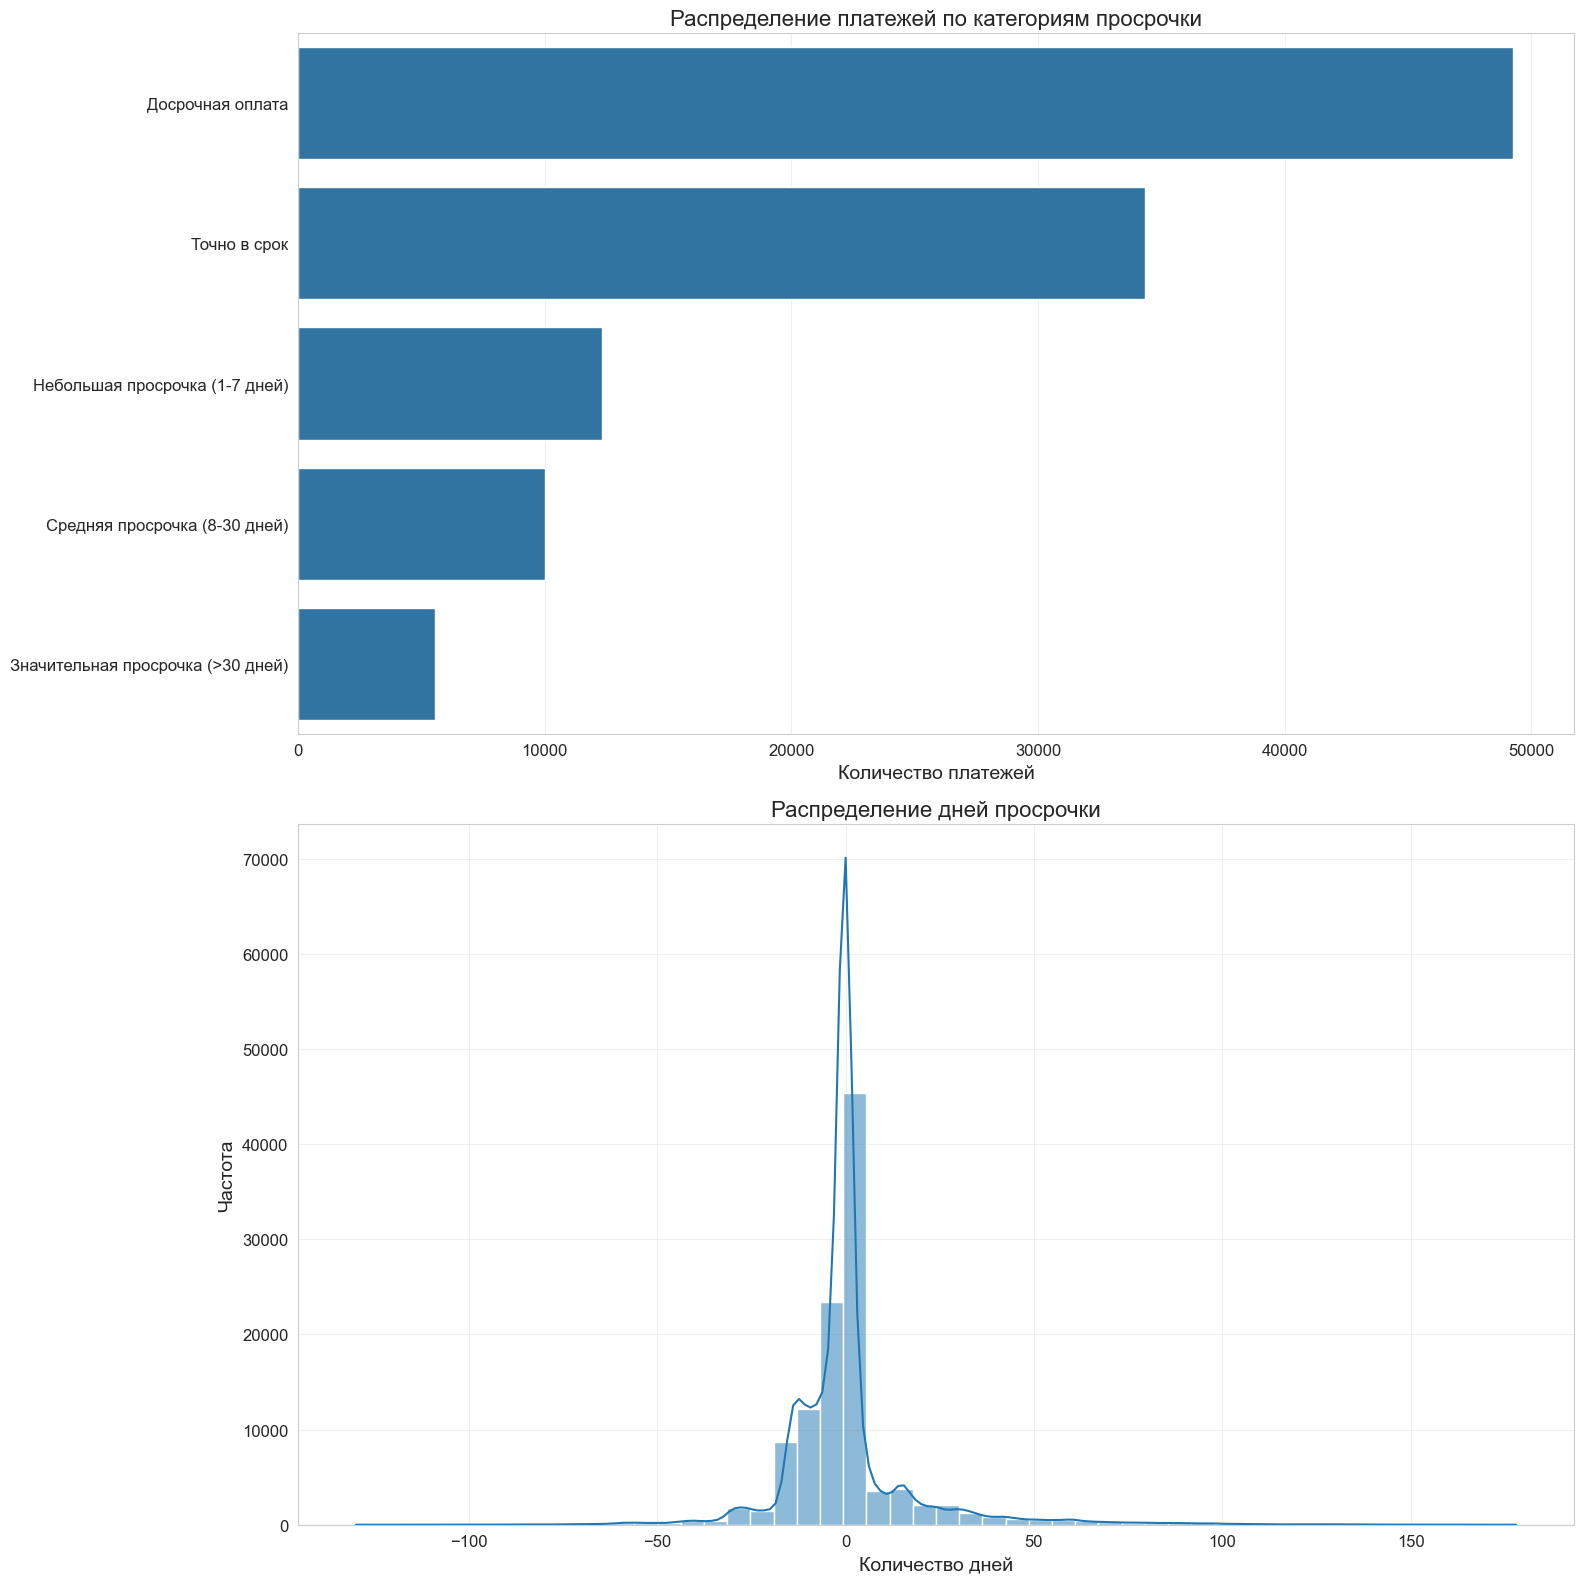

In [34]:
# преобразуем дни в числовой формат
merged_df_closed['days_late_numeric'] = merged_df_closed['days_late_sec'].apply(
                                            lambda x: pd.Timedelta(x).days if pd.notnull(x) else None
                                                                                )

# создаем категории просрочки
def categorize_late_days(days):
    if days < 0:
        return 'Досрочная оплата'
    elif days == 0:
        return 'Точно в срок'
    elif 0 < days <= 7:
        return 'Небольшая просрочка (1-7 дней)'
    elif 7 < days <= 30:
        return 'Средняя просрочка (8-30 дней)'
    else:
        return 'Значительная просрочка (>30 дней)'

merged_df_closed['late_category'] = merged_df_closed['days_late_numeric'].apply(categorize_late_days)


plt.figure(figsize=(16, 16))
# распределение по категориям просрочки
plt.subplot(2, 1, 1)
sns.barplot(y=merged_df_closed['late_category'].value_counts().index,
            x=merged_df_closed['late_category'].value_counts())
plt.title('Распределение платежей по категориям просрочки')
plt.xlabel('Количество платежей')
plt.ylabel('')

# гистограмма распределения дней просрочки
plt.subplot(2, 1, 2)
sns.histplot(merged_df_closed['days_late_numeric'], bins=50, kde=True)
plt.title('Распределение дней просрочки')
plt.xlabel('Количество дней')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Теперь будут клиенты еще не закрывшие свой кредит.

C:\Users\Admin\AppData\Local\Temp\ipykernel_8812\3533778470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_not_closed['days_late_numeric'] = merged_df_not_closed['days_late_sec'].apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_8812\3533778470.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_not_closed['late_category'] = merged_df_not_closed['days_late_numeric'].apply(categorize_late_days)


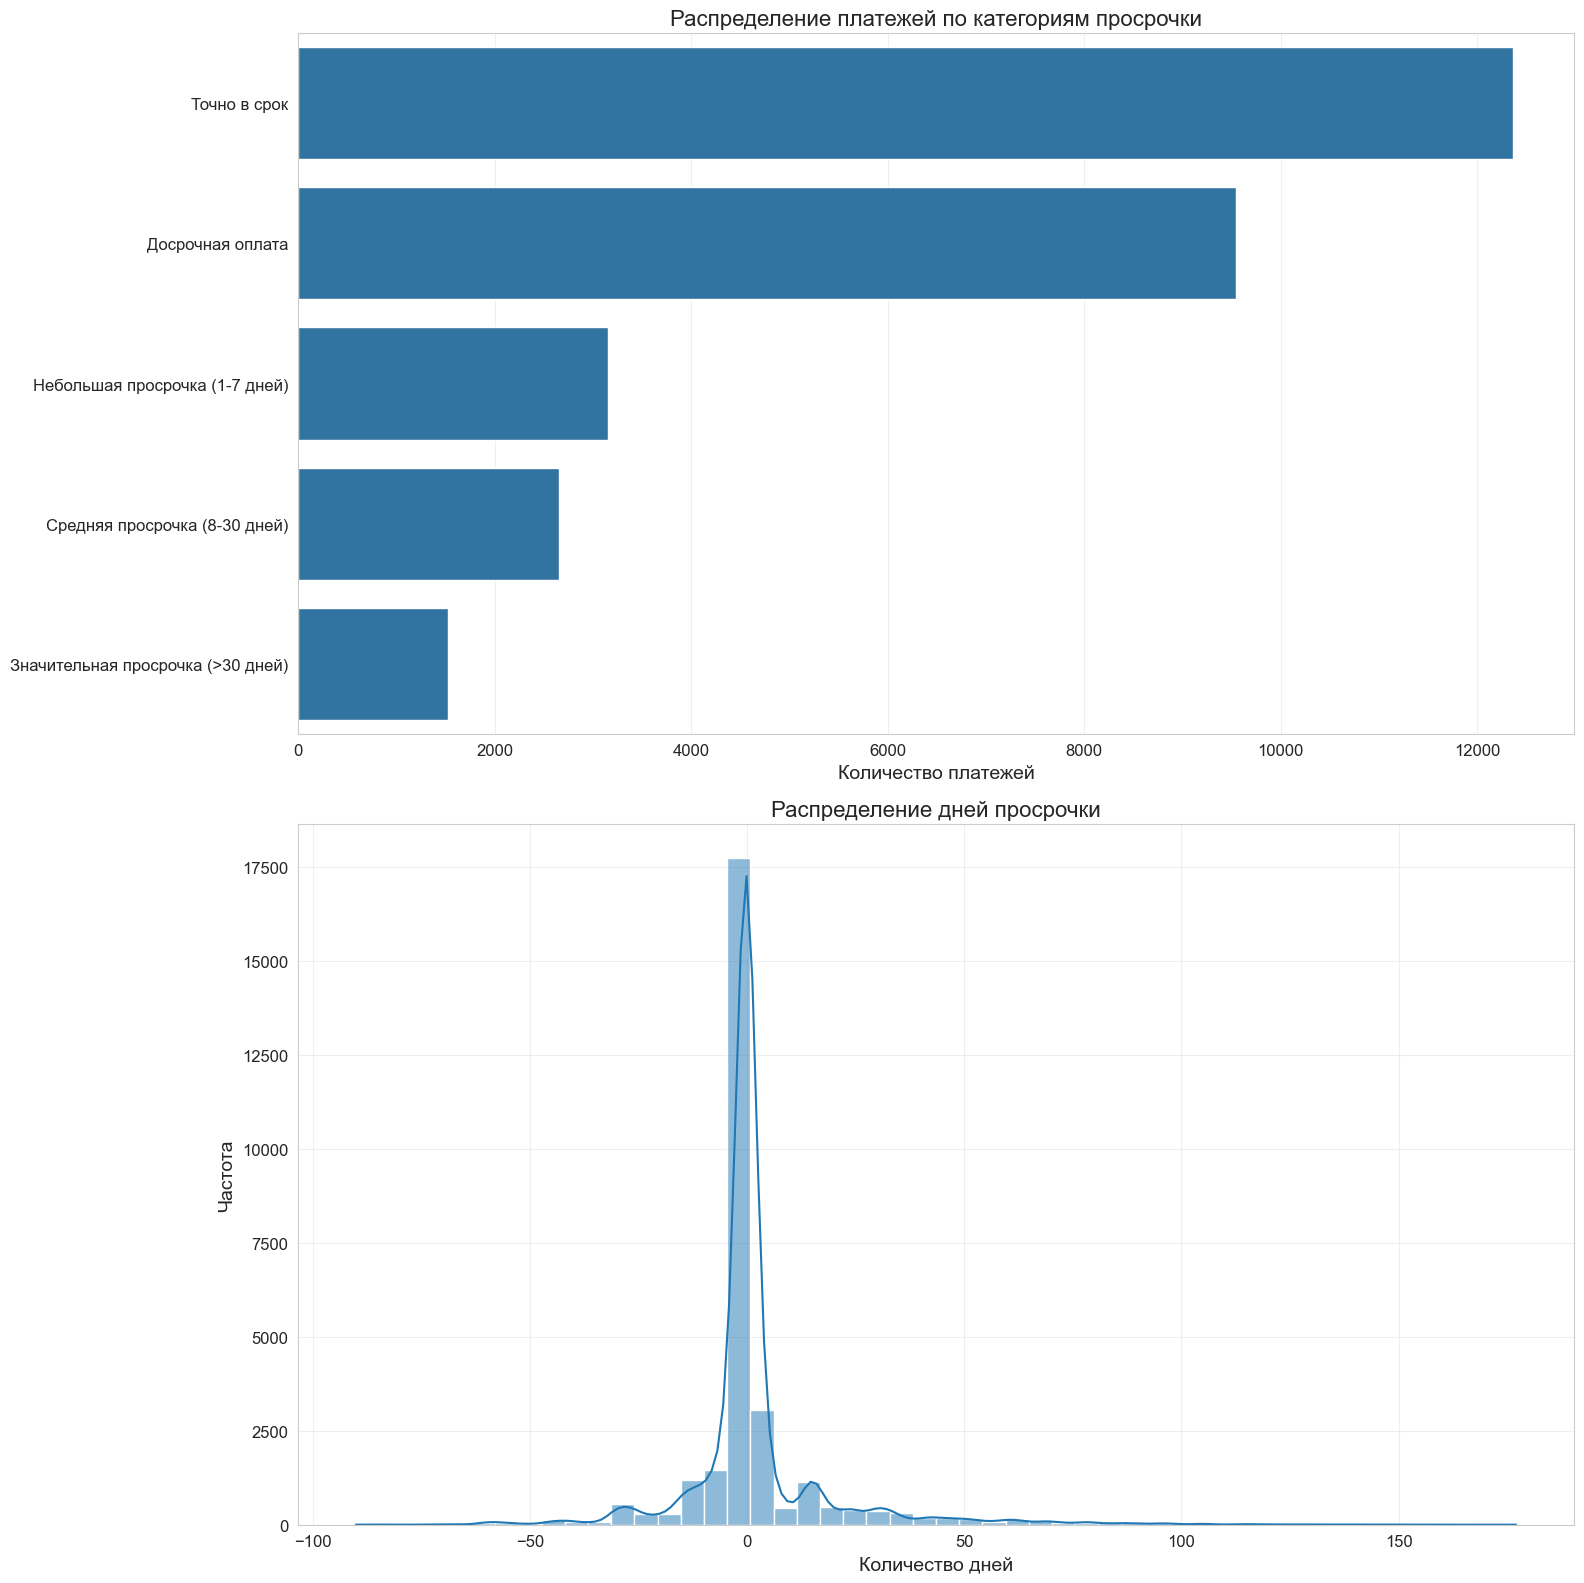

In [35]:
# преобразуем дни в числовой формат
merged_df_not_closed['days_late_numeric'] = merged_df_not_closed['days_late_sec'].apply(
                                            lambda x: pd.Timedelta(x).days if pd.notnull(x) else None
                                                                                )

# создаем категории просрочки
def categorize_late_days(days):
    if days < 0:
        return 'Досрочная оплата'
    elif days == 0:
        return 'Точно в срок'
    elif 0 < days <= 7:
        return 'Небольшая просрочка (1-7 дней)'
    elif 7 < days <= 30:
        return 'Средняя просрочка (8-30 дней)'
    else:
        return 'Значительная просрочка (>30 дней)'

merged_df_not_closed['late_category'] = merged_df_not_closed['days_late_numeric'].apply(categorize_late_days)


plt.figure(figsize=(16, 16))
# распределение по категориям просрочки
plt.subplot(2, 1, 1)
sns.barplot(y=merged_df_not_closed['late_category'].value_counts().index,
            x=merged_df_not_closed['late_category'].value_counts())
plt.title('Распределение платежей по категориям просрочки')
plt.xlabel('Количество платежей')
plt.ylabel('')

# гистограмма распределения дней просрочки
plt.subplot(2, 1, 2)
sns.histplot(merged_df_not_closed['days_late_numeric'], bins=50, kde=True)
plt.title('Распределение дней просрочки')
plt.xlabel('Количество дней')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

И по закрытым и не закрытым кредитам видно что большая часть платежей осуществлялась в срок.  

# 5. Расчет просрочки кредита

## 5.1. Для закрытых кредитов

Создадим итоговую таблицу для анализа просрочки.

In [36]:
# формирование итоговой таблицы по месяцам
monthly_stats = merged_df_closed.groupby(pd.Grouper(key='plan_at', freq='ME')).agg(
    total_payments=('paid_at', 'count'),
    late_payments=('is_late', 'sum'),
    avg_days_late=('days_late_0', 'mean'),
    underpayment_sum=('underpayment_0', 'sum'),
    total_underpayment=('is_underpayment', 'sum')
)

# расчет процентов
monthly_stats['late_percent'] = monthly_stats['late_payments'] / monthly_stats['total_payments'] * 100
monthly_stats['is_underpayment_percent'] = monthly_stats['total_underpayment'] / monthly_stats['total_payments'] * 100

Наконец отобразим все на графике.

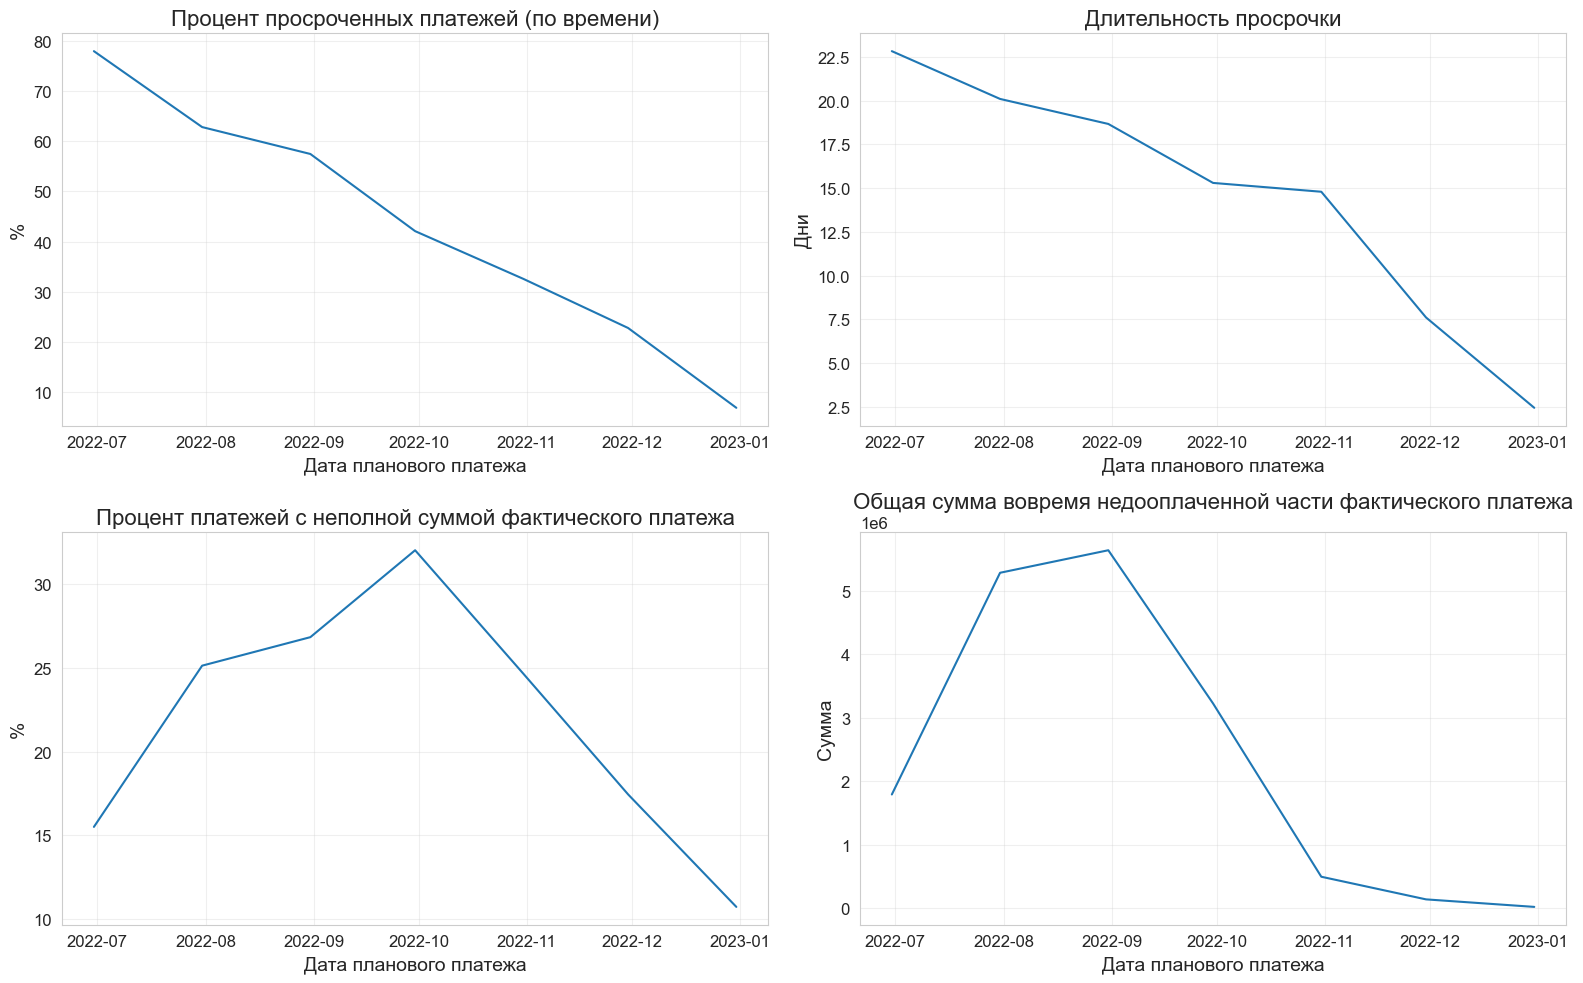

In [37]:
plt.figure(figsize=(16, 10))

# график процента просрочки кредита по дням
plt.subplot(2, 2, 1)
sns.lineplot(data=monthly_stats, x=monthly_stats.index, y='late_percent')
plt.title('Процент просроченных платежей (по времени)')
plt.xlabel('Дата планового платежа')
plt.ylabel('%')

# график средней длительности просрочки
plt.subplot(2, 2, 2)
sns.lineplot(data=monthly_stats, x=monthly_stats.index, y='avg_days_late')
plt.title('Длительность просрочки')
plt.xlabel('Дата планового платежа')
plt.ylabel('Дни')

# график процента недоплаты платежей
plt.subplot(2, 2, 3)
sns.lineplot(data=monthly_stats, x=monthly_stats.index, y='is_underpayment_percent')
plt.title('Процент платежей с неполной суммой фактического платежа')
plt.xlabel('Дата планового платежа')
plt.ylabel('%')

# График средней длительности просрочки
plt.subplot(2, 2, 4)
sns.lineplot(data=monthly_stats, x=monthly_stats.index, y='underpayment_sum')
plt.title('Общая сумма вовремя недооплаченной части фактического платежа')
plt.xlabel('Дата планового платежа')
plt.ylabel('Сумма')

plt.tight_layout()
plt.show()

**Выводы:**

- В начале периода (2022-07) процент просроченных платежей был высоким, достигая около 70%. С течением времени наблюдается значительное снижение, и к концу периода (2023-01) показатель упал до минимального уровня.

- Длительность просрочки также демонстрирует снижение. В начале периода она составляла около 22,5 дней, а к концу снизилась до минимального значения. Тенденцию к сокращению сроков просрочек.

- В 2022-07 наблюдался рост процента неполной суммы платежа до 30%, но затем произошло резкое снижение.К концу периода показатель достиг минимального уровня.

- Сумма вовремя недооплаченной части также снизилась с 5 миллионов до минимального значения. Это свидетельствует о том, что клиенты стали чаще оплачивать полную сумму в срок.

В целом наблюдается **положительная динамика** в снижении просрочек для закрытых кредитов.

## 5.2. Для не закрытых кредитов

Создадим итоговую таблицу для анализа просрочки.

In [38]:
# формирование итоговой таблицы по месяцам
monthly_stats = merged_df_not_closed.groupby(pd.Grouper(key='plan_at', freq='ME')).agg(
    total_payments=('paid_at', 'count'),
    late_payments=('is_late', 'sum'),
    avg_days_late=('days_late_0', 'mean'),
    underpayment_sum=('underpayment_0', 'sum'),
    total_underpayment=('is_underpayment', 'sum')
)

# расчет процентов
monthly_stats['late_percent'] = monthly_stats['late_payments'] / monthly_stats['total_payments'] * 100
monthly_stats['is_underpayment_percent'] = monthly_stats['total_underpayment'] / monthly_stats['total_payments'] * 100

Наконец отобразим все на графике.

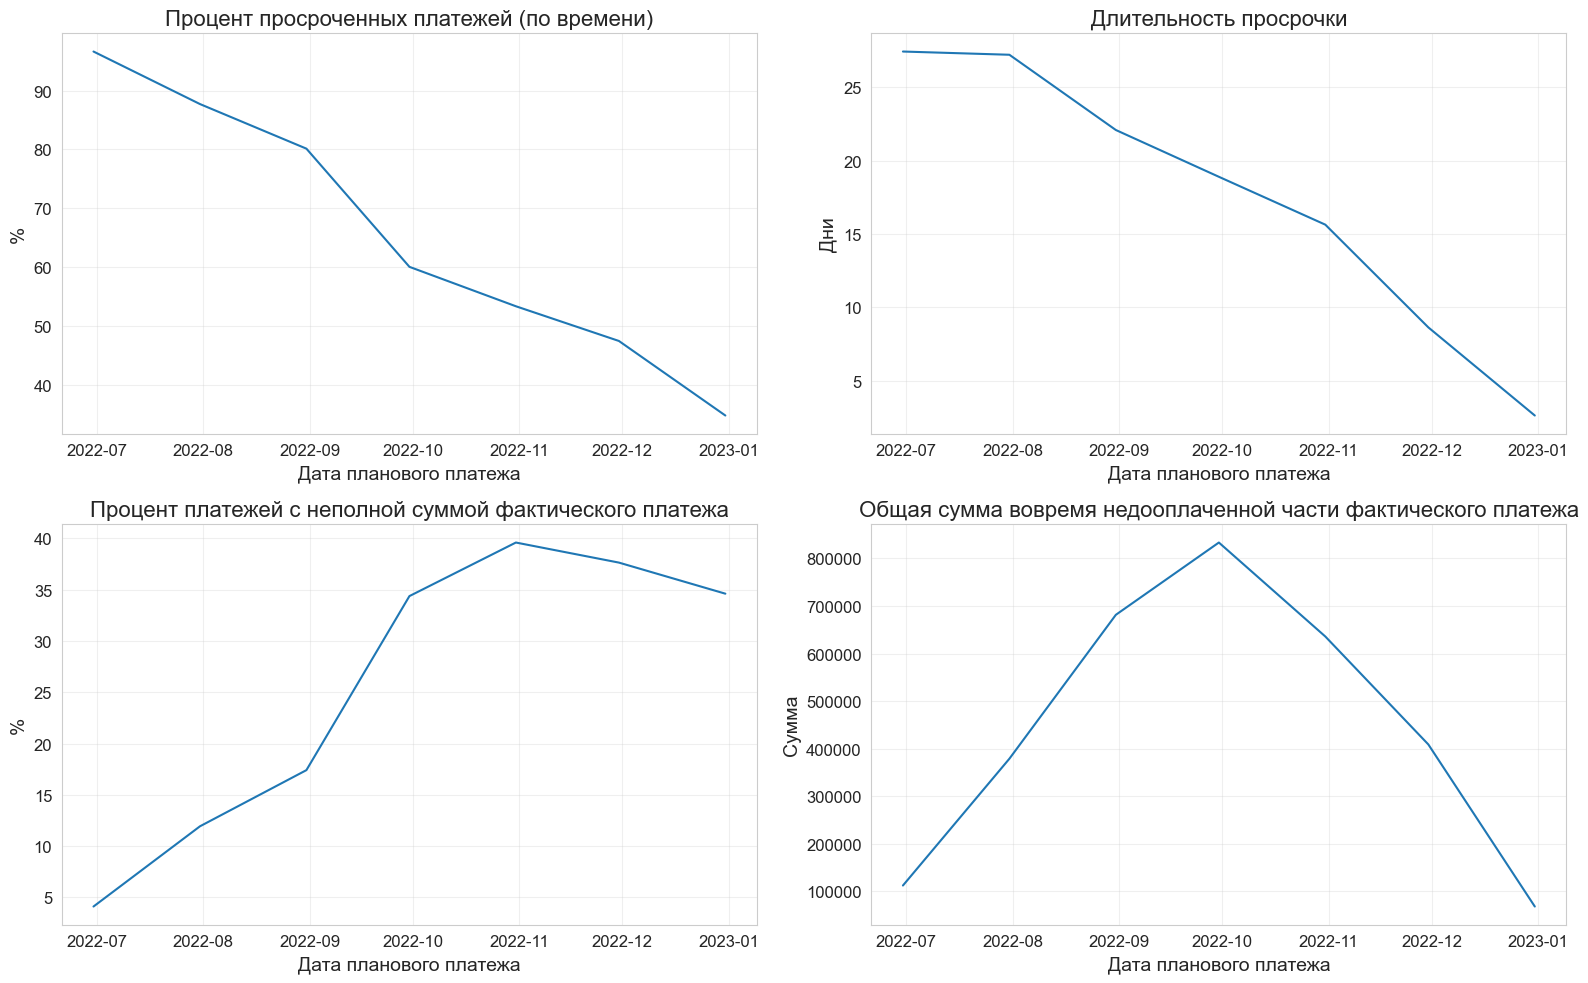

In [39]:
plt.figure(figsize=(16, 10))

# график процента просрочки кредита по дням
plt.subplot(2, 2, 1)
sns.lineplot(data=monthly_stats, x=monthly_stats.index, y='late_percent')
plt.title('Процент просроченных платежей (по времени)')
plt.xlabel('Дата планового платежа')
plt.ylabel('%')

# график средней длительности просрочки
plt.subplot(2, 2, 2)
sns.lineplot(data=monthly_stats, x=monthly_stats.index, y='avg_days_late')
plt.title('Длительность просрочки')
plt.xlabel('Дата планового платежа')
plt.ylabel('Дни')

# график процента недоплаты платежей
plt.subplot(2, 2, 3)
sns.lineplot(data=monthly_stats, x=monthly_stats.index, y='is_underpayment_percent')
plt.title('Процент платежей с неполной суммой фактического платежа')
plt.xlabel('Дата планового платежа')
plt.ylabel('%')

# График средней длительности просрочки
plt.subplot(2, 2, 4)
sns.lineplot(data=monthly_stats, x=monthly_stats.index, y='underpayment_sum')
plt.title('Общая сумма вовремя недооплаченной части фактического платежа')
plt.xlabel('Дата планового платежа')
plt.ylabel('Сумма')

plt.tight_layout()
plt.show()

**Вывод:**

- В начале периода (2022-07) процент просроченных платежей был высоким, достигая около 90%. С течением времени наблюдается значительное снижение, и к концу периода (2023-01) показатель упал до минимального уровня.

- Длительность просрочки также демонстрирует снижение. В начале периода она составляла около 25 дней, а к концу снизилась до минимального значения. Тенденцию к сокращению сроков просрочек.

- В 2022-07 наблюдался стремительный рост процента неполной суммы платежа до 40%, но затем произошло постепенное снижение до 35%.

- Сумма вовремя недооплаченной части сначала стремительно росла, а затем снизилась с 800 000 до минимального значения. Значит клиенты стали чаще оплачивать полную сумму в срок.

В целом наблюдается **положительная динамика** в снижении просрочек для не закрытых кредитов. 

# 6. Вывод

Качество платежей демонстрирует неоднородную картину:

- Значительная часть платежей совершается своевременно.

- Наблюдаются случаи как досрочных платежей, так и существенных задержек.

- Встречаются как полные, так и частичные платежи.

Тенденции по просрочкам:

- Начальный период характеризовался высоким процентом просроченных платежей (около 90%). К концу периода наблюдается значительное улучшение показателей.

- Средняя длительность просрочки сократилась с 25 дней до минимальных значений. 

**Общий вывод**.

Просрочки по времени в начале периода были высокие, но в конце периода приближались к минимуму. И это же касается суммы вовремя недооплаченной части фактического платежа. Несмотря на начальные сложности с показателями, наблюдается положительная динамика по всем ключевым показателям. 

In [41]:
# merged_df_not_closed.to_csv('data/not_closed.csv')
# merged_df_closed.to_csv('data/closed.csv')